# Intro to ML and NN

Nicole Hartman, PALMS2024

## Table of Contents:

**Exercise 1:** Linear models

**Exercise 2:** Neural networks

**Exercise 3:** Automatic diff frameworks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1: What is the model?


**Step 1:** Load in the model in numpy

In [2]:
# Open the file (Is this smth they'll have learned

Text(0, 0.5, '$y$')

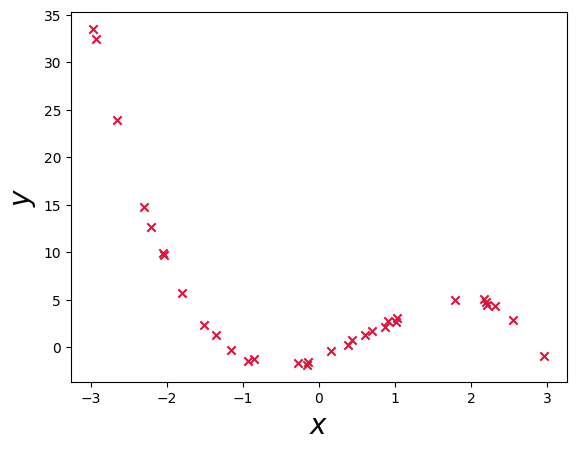

In [20]:
'''
Soln: The code that generated the dataset
'''
N = 32
x = np.random.uniform(-3,3,N)

# Construct the "features" for the linear model,
# assumed to be a third order polynomial
x0 = np.ones_like(x)
x1 = x
x2 = x**2
x3 = x**3

X = np.column_stack([x0,x1,x2,x3])

eps = 0.2 * np.random.randn(N)

theta_true = np.array([-1,3,2,-1])

y = X @ theta_true + eps

plt.scatter(x,y,marker='x',color='crimson')
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

In [21]:
# X.shape

In [22]:
# y.shape

**Q:** Should I ask them to code up the evaluation function?

In [23]:
# xx_all.shape

In [24]:
theta = np.random.randn(4,)

In [25]:
def get_predicion(X,theta):
    '''
    Evaluate a linear model that is a 3rd order polynomial

    fx = theta[0] + theta[1] * x + 


    Input:
    - x: shape N
    - theta: 4

    Output:
    - fx: shape N
    '''
    
    assert theta.shape[0] == 4 # sanity check for 3rd order polynomial
    
    '''
    Your code here!
    '''
    # fx = theta[0] + theta[1] * x + theta[2] * x**2 + theta[3] * x**3  # soln
    fx = theta[0] * X[:,0] + theta[1] * X[:,1] + theta[2] * X[:,2] + theta[3] * X[:,3]
    
    return fx

**What is the loss?**

In [26]:
theta.shape

(4,)

In [27]:
def get_loss(y_pred, y_true):
    '''
    Calculate the Mean Squared Error (MSE) loss over N examples

    Inputs:
    - y_pred: (N,) array
    - y_true: (N,) array

    Outputs:
    - loss: scalar
    '''

    assert len(y_pred) == len(y_true) # sanity check the inputs make sense

    '''
    Your code here
    '''
    N = len(y_pred)
    loss = (1/N) * np.sum((y_pred - y_true)**2) # soln

    return loss

In [28]:
'''
Note, maybe I want to provide the full vector X?
'''
y_pred = get_predicion(X, theta) 
loss = get_loss(y_pred,y)

In [29]:
y_pred

array([-33.46514069,   9.10979428,  12.75689016, -14.65549159,
         9.27175555,  25.66978852,  -0.52710156,   0.12888637,
        -8.2323608 ,  11.33310816,   1.62343486,  -1.26253593,
       -14.00302194,   1.43349331, -14.75228351,   0.68916163,
         0.60253112,   0.6085815 ,   0.05041023,  19.1966382 ,
         3.28242373,   6.52969426,  -1.12768305,  -0.28308374,
         0.3916423 ,   4.20709273,  -1.77596434, -16.74512573,
        -1.78035453, -22.0886391 ,  26.59914073,   2.35864003])

In [33]:
# The initial loss
loss

114.4861299266474

In [34]:
def vectorify(x):
    x0 = np.ones_like(x)
    x1 = x
    x2 = x**2
    x3 = x**3
    
    X = np.column_stack([x0,x1,x2,x3])
    return X    

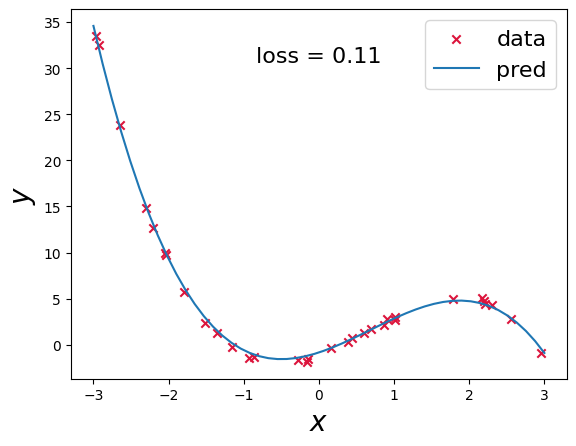

In [45]:
# Overlay the "initial guess" of the data prediction
y_pred = get_predicion(X,theta)

plt.scatter(x,y,marker='x',color='crimson',label='data')

# plt.scatter(x,y_pred,marker='o',color='navy',label=r'$h_\theta(x)$')

ax = plt.gca()
plt.text(.5,.9,f'loss = {loss:2.2f}',fontsize=16,
         ha='center',va='top',transform=ax.transAxes)

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

# Get the continuous version of the prediction
xx = np.linspace(-3,3)
X_smoooth = vectorify(xx)
f_theta = get_predicion(X_smoooth,theta)
plt.plot(xx,f_theta, label='pred' )

plt.legend(fontsize=16)

In [46]:
def get_grad(X,y,theta):
    '''
    Code up the gradient of the loss with respect to theta.

    Input:
    - X: array (N,d)
    - y: array (N,)
    - theta: (d,)

    Output:
    - dtheta: (d,)
    '''

    assert X.shape[0] == y.shape[0]
    assert X.shape[1] == theta.shape[0]
    
    '''
    Your code here?
    Or, do I want to just give it to them
    '''
    # y_pred = get_predicion
    dtheta = 1/len(y) * 2*((X @ theta - y).T @ X)
    # dtheta = (y_pred - y).T @ X / X.shape[0] # alternative solution
    
    return dtheta


**Next:** Set up a training loop to infer the parameters

In [47]:
loss

0.11344493934434771

In [48]:
alpha=.005

In [49]:
losses = []
thetas = []

for i in range(501):

    # Calculate y_pred
    y_pred = get_predicion(X,theta)
    
    # Get the loss
    loss = get_loss(y_pred,y)

    # Calculate the gradient
    dtheta = get_grad(X,y,theta)
    
    # Update the parameters
    theta -= alpha * dtheta
    
    # Save the values
    losses.append(loss)
    thetas.append(theta)

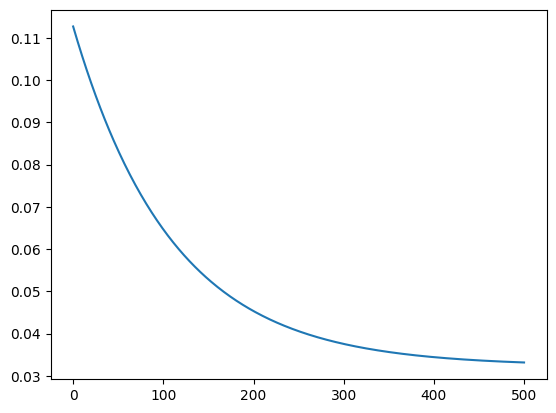

In [50]:
plt.plot(losses)
# plt.ylim(0,10)

In [51]:
losses[-10:]

[0.03321309168549366,
 0.033204729458328405,
 0.03319644288298179,
 0.033188231274657,
 0.033180093954759654,
 0.03317203025084137,
 0.033164039496544104,
 0.03315612103154493,
 0.03314827420150164,
 0.033140498357998066]

In [52]:
# Make a gif(?)

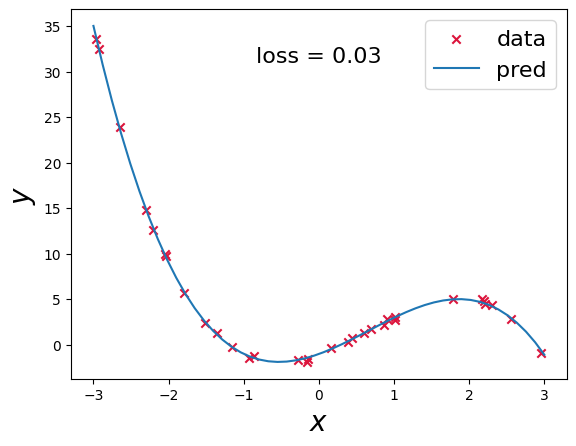

In [53]:
# Overlay the "initial guess" of the data prediction
y_pred = get_predicion(X,theta)

plt.scatter(x,y,marker='x',color='crimson',label='data')

# plt.scatter(x,y_pred,marker='o',color='navy',label=r'$h_\theta(x)$')

ax = plt.gca()
plt.text(.5,.9,f'loss = {loss:2.2f}',fontsize=16,
         ha='center',va='top',transform=ax.transAxes)

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

# Get the continuous version of the prediction
X_smoooth = vectorify(xx)
f_theta = get_predicion(X_smoooth,theta)
plt.plot(xx,f_theta, label='pred' )

plt.legend(fontsize=16)

**Feature engineering** 